In [ ]:
!pip install groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.7/126.7 kB 5.3 MB/s eta 0:00:00


In [ ]:
from groq import Groq
import base64
from IPython.display import Image
import os

In [ ]:
from google.colab import userdata
os.environ["GROQ_API_KEY"] = userdata.get('groq')

In [ ]:
client = Groq()
llama32_model = 'llama-3.2-11b-vision-preview'
llama31_model = 'llama-3.1-70b-versatile'

In [ ]:
llama33_model = 'llama-3.3-70b-versatile'

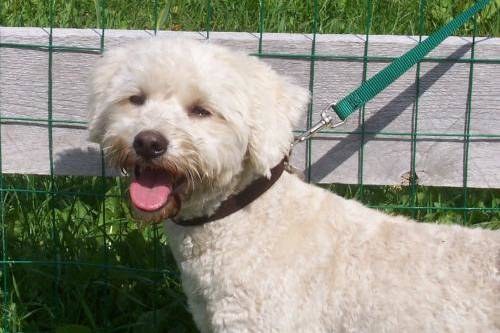

In [ ]:
image_path = '/content/drive/MyDrive/dog.143.jpg'
Image(image_path)

In [ ]:
# Defining image encoding function
def encode_image(image_path):
  with open(image_path, "rb") as image_file:
    return base64.b64encode(image_file.read()).decode('utf-8')

base64_image = encode_image(image_path)

In [ ]:
# Define image to text function
def image_to_text(client, model, base64_image, prompt):
  chat_completion = client.chat.completions.create(
      messages=[
          {
             "role":"user",
             "content": [
                 {"type":"text", "text":prompt},
                 {
                     "type":"image_url",
                     "image_url":{
                         "url":f"data:image/jpeg;base64,{base64_image}",
                     },
                 },
             ],
          }
      ],
      model=model
  )
  return chat_completion.choices[0].message.content

prompt = "Describe this image"

image_to_text(client, llama32_model, base64_image, prompt)

"The image depicts a medium-sized, curly-haired dog, likely a poodle or terrier mix, standing in front of a green fence. The dog has a fluffy white coat with a brown collar and a brown muzzle, and its mouth is open, revealing its pink tongue. Its fur is moderately long and curly, and it appears to be medium-sized, with its tail out of frame. The dog is facing left but turns its head to look directly at the camera.\n\nIn the background, a green fence made of wood and green wire is visible, with a gray wooden board partially covering it. The fence is attached to a grassy area, and a leash attached to the dog's collar hangs over the fence, indicating that it is on a walk. The overall atmosphere of the image suggests a sunny day, with the dog appearing happy and relaxed."

In [ ]:
# Defining short story generation function
def short_story_generation(client, image_description):
  chat_completion = client.chat.completions.create(
      messages=[
          {
              "role": "user",
              "content": image_description,
          }
      ],
      model=llama33_model
  )
  return chat_completion.choices[0].message.content

prompt = "Describe this image in detail, including the appearance of the dog(s) and any notable actions or behaviours."

image_description = image_to_text(client, llama32_model, base64_image, prompt)

print(short_story_generation(client, image_description))

Your description of the image paints a vivid picture of a serene and idyllic scene. The small white dog, with its curly and fluffy coat, dark eyes, nose, and mouth, appears to be the central focus of the image. The fact that it's standing before a green wire fence and a plank of wood suggests that it's in some sort of outdoor enclosure or pen.

The details you've provided about the dog's accessories, such as the brown collar and teal leash, add a touch of warmth and personality to the scene. The leash running around the backside of the fence implies that the dog may have been recently walked or is waiting to be taken out.

The background of the image, with the green wire fence, gray board, and lush grass beyond, creates a sense of depth and context. The shadows cast by the dog and the fence on the ground add a sense of dimensionality to the scene.

Your interpretation of the dog's emotions, suggesting that it seems happy and content in its enclosure, adds a touching and relatable eleme

In [17]:
base64_image1 = encode_image('/content/drive/MyDrive/horse-142.jpg')
base64_image2 = encode_image('/content/drive/MyDrive/dog.143.jpg')

image_description1 = image_to_text(client, llama32_model, base64_image1, prompt)
image_description2 = image_to_text(client, llama32_model, base64_image2, prompt)

combined_image_description = image_description1 + '\n\n' + image_description2

print(short_story_generation(client, combined_image_description))

It seems like there are two separate descriptions of images provided. The first description is about two white horses competing on a beach on an overcast day, while the second description is about a white dog sitting in front of a fence with a leash attached to it.

To address both descriptions, I'll provide a summary of each:

**Image 1: Two White Horses**

The image depicts two white horses engaged in a fierce competition on a beach. They are positioned in the center and right of the image, with their front hooves extended and hind legs straddled. The horses' muscular structure is visible, and their white coats stand out against the dynamic sky with dark clouds. The background features a mix of calm and rough waters, with green algae scattered along the beach.

**Image 2: A White Dog**

The image shows a white, fluffy dog sitting in front of a fence with a leash attached to its collar. The dog appears to be happy and relaxed, with its tongue hanging out of its mouth. The fence is mad